## Final Project Submission

Please fill out:
* Student name: Brian Amolo
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Asha Deen
* Blog post URL:


In [2]:
# Your code here - remember to use markdown cells for comments as well!

# import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# data files
IMDB_TITLE_BASICS = "zippedData/imdb.title.basics.csv/title.basics.csv"
IMDB_NAME_BASICS = "zippedData/imdb.name.basics.csv/name.basics.csv"
BOM_MOVIE_GROSS = "zippedData/bom.movie_gross.csv"
IMDB_TITLE_RATINGS = "zippedData/title.ratings.csv"

RT_REVIEWS = "zippedData/rt.reviews.tsv"
RT_MOVIE_INFO = "zippedData/rt.movie_info.tsv"

TN_MOVIE_BUDGETS  = "zippedData/tn.movie_budgets.csv"


# read data into pandas DF
IMDB_TITLE_BASICS = pd.read_csv(IMDB_TITLE_BASICS)
IMDB_TITLE_RATINGS = pd.read_csv(IMDB_TITLE_RATINGS)


TN_MOVIE_BUDGETS = pd.read_csv(TN_MOVIE_BUDGETS)

### Preview Data

This will enable us generate some insights about this data

In [3]:
# Preview Data
# IMDB_TITLE_BASICS.head(5)
IMDB_TITLE_RATINGS.head(5)


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
# Get information about DataFrame
IMDB_TITLE_BASICS.info()

# Summary statistics
IMDB_TITLE_BASICS.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


#### Clean this data

In [5]:
# Preview this data once again

IMDB_TITLE_BASICS = IMDB_TITLE_BASICS[IMDB_TITLE_BASICS["genres"] != None]

##### We can then use this info to clean the data.

##### Let's first explore the IMDB_TITLE_BASICS dataset. It contains some information about genres.

1. Remove any nulls.
2. Chart the genre column. (This is for comparison purpose)

In [6]:
genre_series = IMDB_TITLE_BASICS['genres']

runtimes_series = pd.to_numeric(IMDB_TITLE_BASICS['runtime_minutes'])

genre_counts = genre_series.value_counts()

single_genre_series  = IMDB_TITLE_BASICS['genres'].str.split(',').explode()

single_genre_counts = single_genre_series.value_counts()

genre_counts = genre_counts[:20]

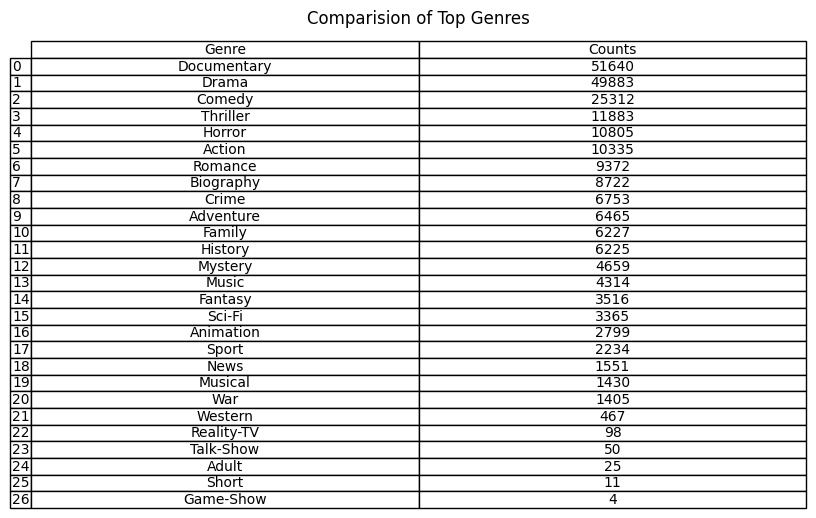

In [7]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
table = pd.DataFrame({"Genre": single_genre_counts.index,
                     "Counts": single_genre_counts.values})
plt.axis('off')

plt.table(cellText=table.values, rowLabels=table.index,
          colLabels=table.columns, cellLoc='center', loc='upper center')
plt.title('Comparision of Top Genres')
# Rotate genre labels for better readability (optional)
plt.show()


#### Chart this data 


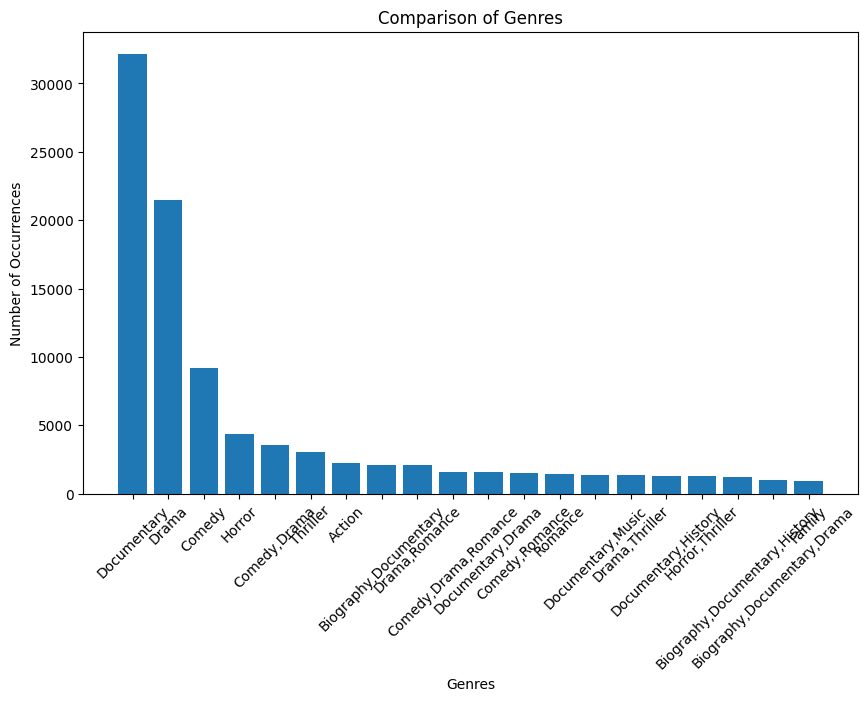

In [8]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genres')
plt.ylabel('Number of Occurrences')
plt.title('Comparison of Genres')
plt.xticks(rotation=45)  # Rotate genre labels for better readability (optional)
plt.show()

# Top Genres

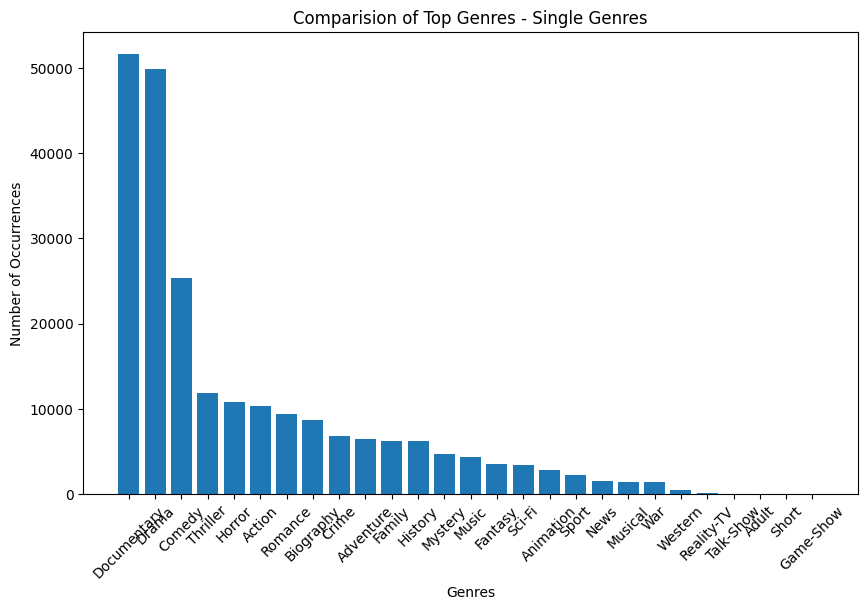

In [20]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.bar(single_genre_counts.index, single_genre_counts.values)
plt.xlabel('Genres')
plt.ylabel('Number of Occurrences')
plt.title('Comparision of Top Genres - Single Genres')
plt.xticks(rotation=45)  # Rotate genre labels for better readability (optional)
plt.show()

#### So which studios...

#### Which movies are they producing?

#### How much are they spending?

#### Which ones have the best return?

## Which producers are they working with

Lets have a glance of this runtime series info

In [10]:
runtimes_series.describe()

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

#### Average Runtime (minutes)

In [11]:
runtimes_series.mean()

86.18724706088021

#### Median Runtime (minutes)

In [12]:
runtimes_series.median()

87.0

#### Runtime pd.Series Info

In [13]:
runtimes_series.info()

<class 'pandas.core.series.Series'>
Int64Index: 146144 entries, 0 to 146143
Series name: runtime_minutes
Non-Null Count   Dtype  
--------------   -----  
114405 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


😅 - Plenty of null values.
Let's get rid of them

In [14]:
runtimes_series = runtimes_series[runtimes_series != None]
runtimes_series = runtimes_series.dropna()
runtimes_series

0         175.0
1         114.0
2         122.0
4          80.0
5          75.0
          ...  
146135     51.0
146136     84.0
146137     90.0
146139    123.0
146142    116.0
Name: runtime_minutes, Length: 114405, dtype: float64

#### Movie runtime distribution

#### Highly rated movies

#### Budgeting

In [15]:
TN_MOVIE_BUDGETS.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Let's figure out the average spend for production.

In [16]:
TN_MOVIE_BUDGETS.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


Average Production Budget

In [47]:

production_budget_series = pd.to_numeric(TN_MOVIE_BUDGETS['production_budget'].str.replace('[$,]', '', regex=True))

production_budget_df = pd.DataFrame(production_budget_series, columns=['production_budget'])
pd.to_numeric(TN_MOVIE_BUDGETS['production_budget'].str.replace('[$,]', '', regex=True)).mean()


31587757.0965064

Average worldwide gross

In [48]:
pd.to_numeric(TN_MOVIE_BUDGETS['worldwide_gross'].str.replace('[$,]', '', regex=True)).mean()


91487460.90643376

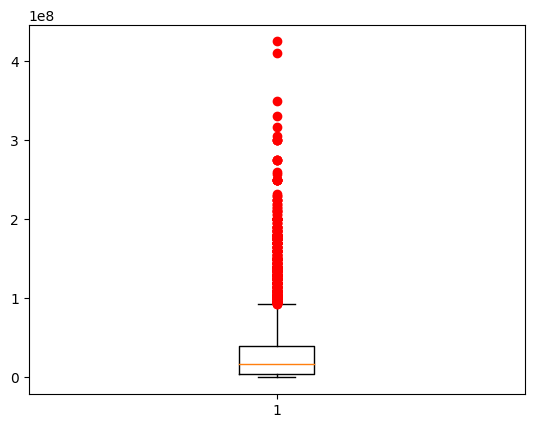

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: int64

In [36]:
# fig, ax = plt.subplots(figsize=(20,6))
plt.boxplot(data=production_budget_df,
            x=production_budget_df["production_budget"], sym="red")
plt.show()

production_budget_series

#### Let's explore the top rated movies.
To do this, we will need to join the two datasets in basic and ratings to get a more comprehensive view of the data.

In [18]:
joined = IMDB_TITLE_BASICS.merge(IMDB_TITLE_RATINGS)

In [37]:
joined.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


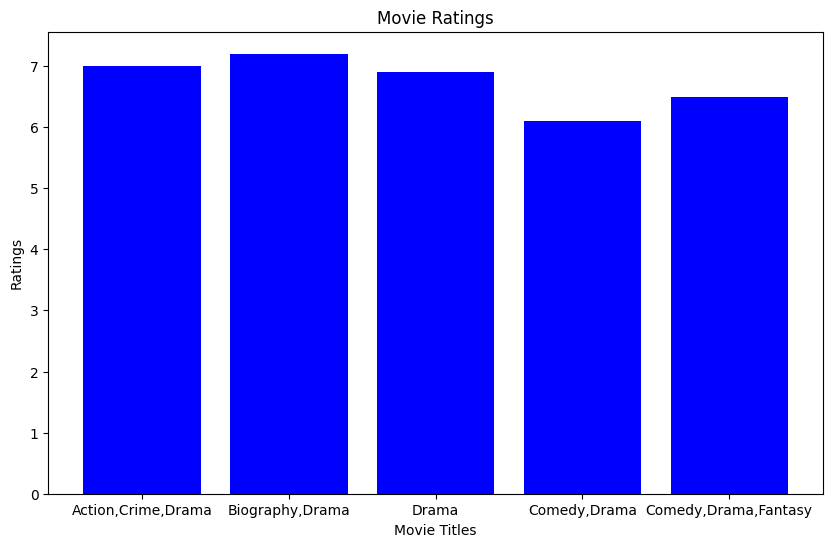

In [40]:
ratings_series = joined['averagerating']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(joined['genres'][:5], pd.to_numeric(ratings_series)[:5], color='blue')

# Add labels and title
plt.xlabel('Movie Titles')
plt.ylabel('Ratings')
plt.title('Movie Ratings per Genres')
plt.show()


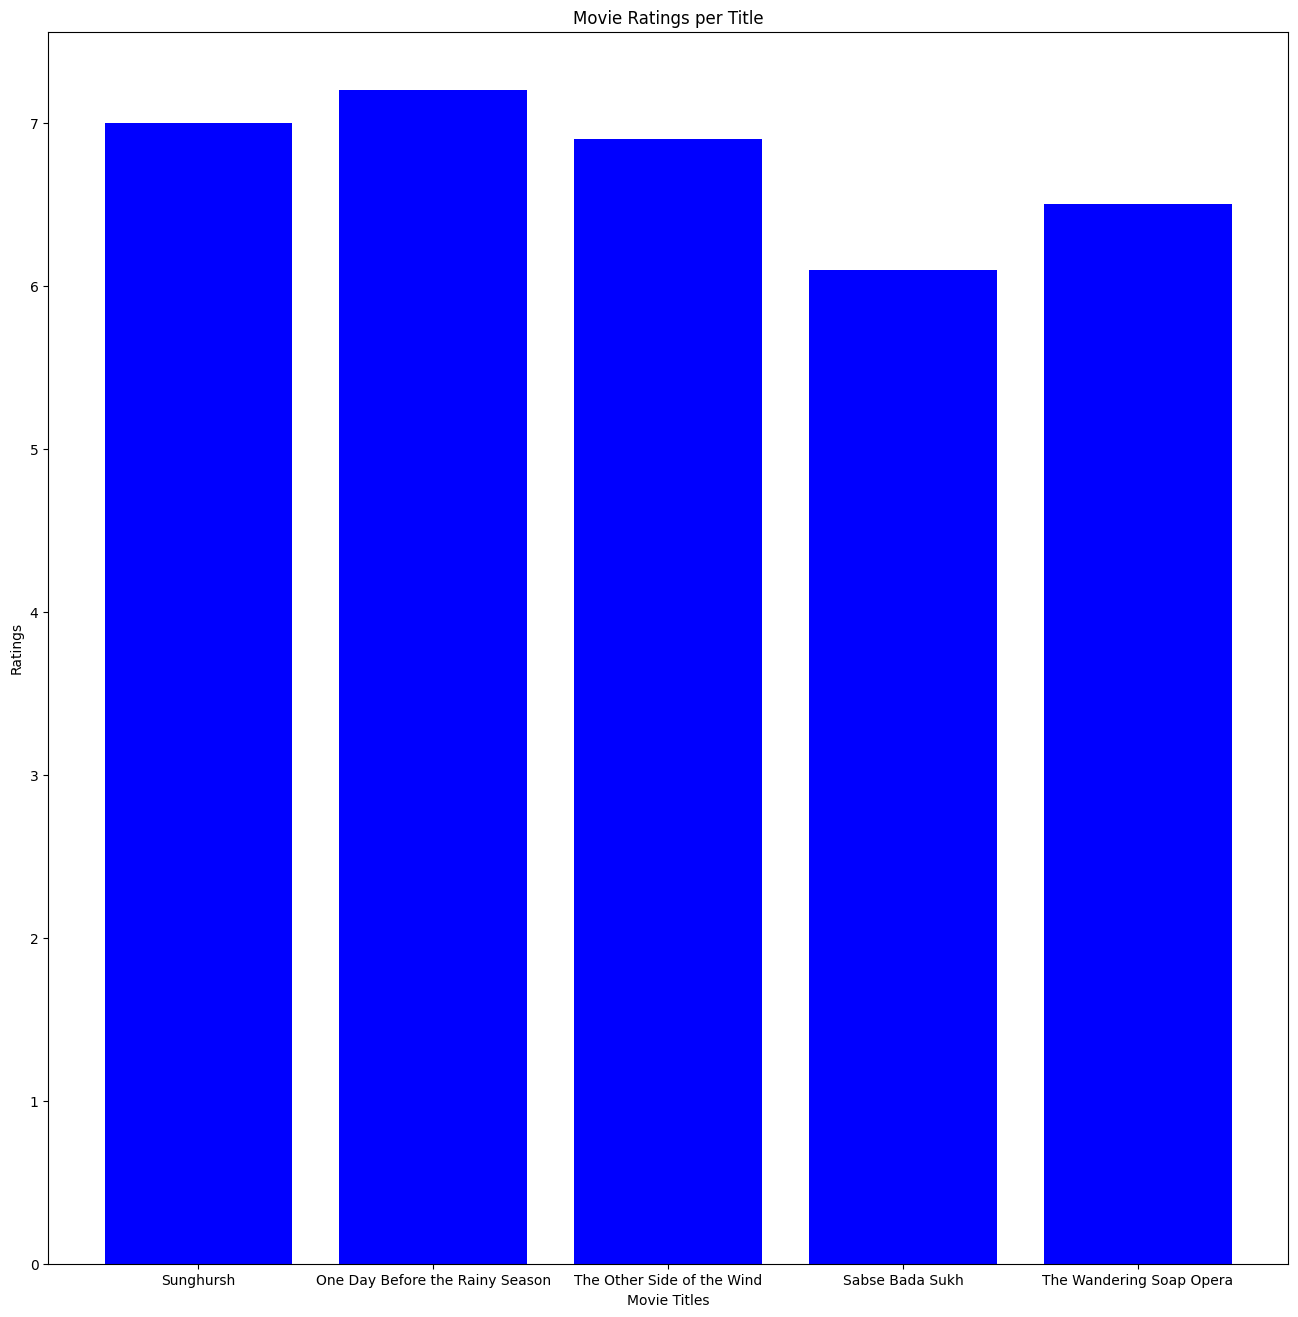

In [45]:

# Create a bar chart
plt.figure(figsize=(16, 16))
plt.bar(joined['primary_title'][:5], pd.to_numeric(ratings_series)[:5], color='blue')

# Add labels and title
plt.xlabel('Movie Titles')
plt.ylabel('Ratings')
plt.title('Movie Ratings per Title')
plt.show()

In [46]:
# Recommendations and Conclusions documented in the slides attached